# **Hands-on Introduction to Machine Learning**

<img src="https://media.geeksforgeeks.org/wp-content/uploads/20230706133033/An-introduction-to-Machine-Learning-01.webp" width="60%" />


<a href="https://colab.research.google.com/github/deep-learning-indaba/indaba-pracs-2023/blob/5-feat-introduction-to-ml-practical/practicals/Intro_ML_English_Prac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> [Change colab link to point to prac.]

© Deep Learning Indaba 2023. Apache License 2.0.

**Authors:**

**Reviewers:**

**Introduction:**

In this tutorial, we will explore the fundamentals of machine learning. Machine Learning allows computers to learn from data and make predictions or decisions without explicit programming.

**Topics:**

Content: Supervised learning, Neural Networks, Numerical Computing

Level: <font color='grey'>`Beginner`


**Aims/Learning Objectives:**

- Understand the basics of Machine learning.
- Train a linear Regession model.
- Train a neural network for multi-class classification.

**Prerequisites:**

- Familiarity with [Numpy](https://numpy.org/doc/stable/user/quickstart.html).

**Outline:**

>[Hands-on Introduction to Machine Learning](#scrollTo=m2s4kN_QPQVe)

>>[What is machine learning](#scrollTo=FVw9C8GugkAj)

>>>[1.1 Examples of Machine learning Applications - Beginner](#scrollTo=fecyoo1o9RP7)

>>>[1.2 Types of machine learning problems - Beginner](#scrollTo=v2k8dcYR9Hvb)

>>>[1.3 Examples of popular machine learning algorithms - Beginner](#scrollTo=AcqMiu7yciJk)

>>>[1.4 Meeting JAX - Beginner](#scrollTo=742JhcnAxTof)

>>>[JAX and NumPy - Differences ❌](#scrollTo=etSsvtmQz9L9)

>>>>[JAX arrays are immutable, while NumPy arrays are not.](#scrollTo=mgu5mHNZ1Esn)

>>>>[Randomness in NumPy vs JAX](#scrollTo=Ik_8oN9m1_zS)

>>>>>[In Numpy, PRNG is based on a global state.](#scrollTo=jaWE-uiW2G4p)

>>>>>[In JAX, PRNG is explicit.](#scrollTo=eNQW9JwK4Yp6)

>>[Regression](#scrollTo=e9NW58_3hAg2)

>>>[2.1 Linear regression - Beginner](#scrollTo=bA_2coZvhAg3)

>>>>[Model representation - Beginner](#scrollTo=kRQihf7uLExw)

>>>>[Cost function and optimization - Beginner](#scrollTo=hNJgESq_LP4R)

>>>>[Training the model using Jax - Beginner](#scrollTo=q9dQh9DdLYPE)

>>>[2.2 Non linear regression and neural networks  - Beginner](#scrollTo=BKtMEnRkhAg9)

>>>>[Model representation - Beginner](#scrollTo=XStsgHB2MarI)

>>>>[Activation functions - Beginner](#scrollTo=fkpytbBzMvMj)

>>>>[Building a simple neural network model with Jax - Beginner](#scrollTo=3Wrxt2orM7sk)

>>[Classification](#scrollTo=fbTsk0MdhAhC)

>>>[3.1 Logistic regression - Beginner](#scrollTo=wMgxJU0TOX6O)

>>>>[Logits and sigmoid activation function - Beginner](#scrollTo=SE1L3rmaO4UP)

>>>>[Extending to Multi-class classification](#scrollTo=HjQNjDC2cG2t)

>>>>[Building a simple neural network for classification - Beginner](#scrollTo=EcXXE56hPOhK)

>>>>[Training the model - Beginner](#scrollTo=GcSvlekHPWxW)

>>>>[Evaluating the model - Beginner](#scrollTo=sGPvmGWkP1fT)

>>[Conclusion](#scrollTo=fV3YG7QOZD-B)

>>[Feedback](#scrollTo=o1ndpYE50BpG)



**Suggested experience level in this topic:**

| Level         | Experience                            |
| --- | --- |
`Beginner`      | It is my first time being introduced to this work. |
`Intermediate`  | I have done some basic courses/intros on this topic. |
`Advanced`      | I work in this area/topic daily. |

In [ ]:
# @title **Paths to follow:** What is your level of experience in the topics presented in this notebook? (Run Cell)
experience = "beginner" #@param ["beginner", "intermediate", "advanced"]

sections_to_follow=""

if experience == "beginner":
  sections_to_follow="Introduction -> 1.1 Subsection -> 2.1 Subsection -> Conclusion -> Feedback"
elif experience == "intermediate":
  sections_to_follow="Introduction -> 1.2 Subsection -> 2.2 Subsection -> Conclusion -> Feedback"
elif experience == "advanced":
  sections_to_follow="Introduction -> 1.3 Subsection -> 2.3 Subsection -> Conclusion -> Feedback"

print(f"Based on your experience, it is advised you follow these -- {sections_to_follow} sections. Note this is just a guideline.")

In [1]:
! pip install dm-haiku --quiet

## Install and import anything required. Capture hides the output from the cell.
# @title Install and import required packages. (Run Cell)

import jax
import jax.numpy as jnp
import haiku as hk
from typing import NamedTuple, Any

import matplotlib.pyplot as plt
import numpy as np


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.3/360.3 kB 5.2 MB/s eta 0:00:00


## **What is machine learning**
In the last two decades, the field of artificial intelligence (AI) has transcended from being mainly used by computer scientists, mathematicians, and physicists to being applied in nearly every domain. It is currently used by almost every literate human being in one form or another. Applications like YouTube and Netflix, which we use on a daily basis, utilize AI to suggest content that we may like.
<center>
<img src="https://s3.ap-southeast-1.amazonaws.com/files-scs-prod/public%2Fimages%2F1605842918803-AI+vs+ML+vs+DL.png" width="60%" />
</center>

AI is the ability to develop smart systems. Machine learning is subset of AI techniques that learns from data using statiscal modelling techniques. Deep Learning is a subset of machine learning that uses artificail neural networks for modelling.

### 1.1 Examples of Machine learning Applications - <font color='blue'>`Beginner`</font>

Below is a list of some popular machine learning applications.

Image Classification, Object Detection, Sentiment Analysis, Speech Recognition, Recommendation Systems, Fraud Detection, Credit Scoring, Healthcare Diagnostics, Drug Discovery, Autonomous Vehicles, Face Recognition, Robotics and Automation, Gaming, Chatbots and Conversational AI, Climate Change Modeling, Clustering, and Data Compression.

### 1.2 Types of machine learning problems - <font color='blue'>`Beginner`</font>

Machine learning is based on learning from data. When formulating a machine learning problem, the first question we need to ask ourselves is what type of learning task do we have? Broadly speaking, machine learning tasks can be classified into three categories.

Supervised Learning: In supervised learning, the algorithm is provided with a labeled dataset, where each input data point is associated with the correct output (label). The goal is to learn a mapping from inputs to outputs based on the training data so that the model can make accurate predictions on new unseen data.

Unsupervised Learning: In unsupervised learning, the algorithm is given an unlabeled dataset, and the goal is to find patterns, structures, or relationships within the data without explicit guidance. The algorithm tries to group similar data points or reduce the dimensionality of the data to reveal underlying structures.

Reinforcement Learning: In reinforcement learning, the algorithm learns to make decisions through interactions with an environment. The learner (agent) receives feedback in the form of rewards or penalties based on its actions, which enables it to learn the best strategy to maximize the cumulative reward over time.

**Excerise 1.1**
- Indentify in which category the examples listed above will be more suitable.



### 1.3 Examples of popular machine learning algorithms - <font color='blue'>`Beginner`</font>
<center>
<img src="https://buffml.com/wp-content/uploads/2022/12/common_ml_algorithms-1006x1024.png" width="80%" />
</center>

The image above list some popular machine learning algorithms with a basic illustration of what each of these alogorithms is trying achieve. In the next section will focus on regression algorithms because they can easily be extended to neural networks that are used for deep learning models.


### 1.4 Meeting JAX - <font color='blue'>`Beginner`</font>

Throughout this tutorial, we will use the [JAX](https://jax.readthedocs.io/en/latest/) framework to illustrate the different concepts we will discuss. Jax is very similar to numpy but they are some important minor differences we need to be aware of.

Similarities between JAX and Numpy

In [ ]:
# Create NumPy arrays
np_array1 = np.array([1, 2, 3])
np_array2 = np.array([4, 5, 6])

# Create JAX arrays
jax_array1 = jnp.array([1, 2, 3])
jax_array2 = jnp.array([4, 5, 6])

# Element-wise addition using NumPy
np_result = np_array1 + np_array2
print("NumPy result:", np_result)

# Element-wise addition using JAX
jax_result = jax_array1 + jax_array2
print("JAX result:", jax_result)

In [ ]:
# Array concatenation using NumPy
np_array1 = np.array([1, 2, 3])
np_array2 = np.array([4, 5, 6])
np_concatenated = np.concatenate([np_array1, np_array2])

# Array concatenation using JAX
jax_array1 = jnp.array([1, 2, 3])
jax_array2 = jnp.array([4, 5, 6])
jax_concatenated = jnp.concatenate([jax_array1, jax_array2])

In [ ]:
# Element-wise functions using NumPy
np_array = np.array([0, np.pi/2, np.pi])
np_sin = np.sin(np_array)

# Element-wise functions using JAX
jax_array = jnp.array([0, jnp.pi/2, jnp.pi])
jax_sin = jnp.sin(jax_array)

In [ ]:
# Reduction operations using NumPy
np_array = np.array([1, 2, 3])
np_sum = np.sum(np_array)
np_mean = np.mean(np_array)

# Reduction operations using JAX
jax_array = jnp.array([1, 2, 3])
jax_sum = jnp.sum(jax_array)
jax_mean = jnp.mean(jax_array)

### JAX and NumPy - Differences ❌

Although JAX and NumPy have some similarities, they do have some important differences:
- Jax arrays are **immutable** (they can't be modified after they are created).
- The way they handle **randomness** -- JAX handles randomness explicitly.



#### JAX arrays are immutable, while NumPy arrays are not.

JAX and NumPy arrays are often interchangeable, **but** Jax arrays are **immutable** (they can't be modified after they are created). Allowing mutations makes transforms difficult and violates conditions for [pure functions](https://en.wikipedia.org/wiki/Pure_function).

Let's see this in practice by changing the number at the beginning of an array.

In [ ]:
# NumPy: mutable arrays
x = np.arange(10)
x[0] = 10
print(x)

Let's try this in JAX.

In [ ]:
# JAX: immutable arrays
# Should raise an error.
try:
    x = jnp.arange(10)
    x[0] = 10
except Exception as e:
    print("Exception {}".format(e))

So it fails! We can't mutate a JAX array once it has been created. To update JAX arrays, we need to use [helper functions](https://jax.readthedocs.io/en/latest/_autosummary/jax.numpy.ndarray.at.html) that return an updated copy of the JAX array.

Instead of doing this `x[idx] = y`, we need to do this `x = x.at[idx].set(y)`.

In [ ]:
x = jnp.arange(10)
new_x = x.at[0].set(10)
print(f" new_x: {new_x} original x: {x}")

Note here that `new_x` is a copy and that the original `x` is unchanged.

#### Randomness in NumPy vs JAX

JAX is more explicit in Pseudo Random Number Generation (PRNG) than NumPy and other libraries (such as TensorFlow or PyTorch). [PRNG](https://en.wikipedia.org/wiki/Pseudorandom_number_generator) is the process of algorithmically generating a sequence of numbers, which *approximate* the properties of a sequence of random numbers.  

Let's see the differences in how JAX and NumPy generate random numbers.

##### In Numpy, PRNG is based on a global `state`.

Let's set the initial seed.

In [ ]:
# Set random seed
np.random.seed(42)
prng_state = np.random.get_state()

In [ ]:
# @title Helper function to compare prng keys (Run Cell)
def is_prng_state_the_same(prng_1, prng_2):
    """Helper function to compare two prng keys."""
    # concat all elements in prng tuple
    list_prng_data_equal = [(a == b) for a, b in zip(prng_1, prng_2)]
    # stack all elements together
    list_prng_data_equal = np.hstack(list_prng_data_equal)
    # check if all elements are the same
    is_prng_equal = all(list_prng_data_equal)
    return is_prng_equal

Let's take a few samples from a Gaussian (normal) Distribution and check if PRNG keys/global state change.

In [ ]:
print(
    f"sample 1 = {np.random.normal()} Did prng state change: {not is_prng_state_the_same(prng_state,np.random.get_state())}"
)
prng_state = np.random.get_state()
print(
    f"sample 2 = {np.random.normal()} Did prng state change: {not is_prng_state_the_same(prng_state,np.random.get_state())}"
)
prng_state = np.random.get_state()
print(
    f"sample 3 = {np.random.normal()} Did prng state change: {not is_prng_state_the_same(prng_state,np.random.get_state())}"
)

Numpy's global random state is updated every time a random number is generated, so *sample 1 != sample 2 != sample 3*.

Having the state automatically updated, makes it difficult to handle randomness in a **reproducible** way across different threads, processes and devices.

##### In JAX, PRNG is explicit.

In JAX, for each random number generation, you need to explicitly pass in a random key/state.

Passing the same state/key results in the same number being generated. This is generally undesirable.

In [ ]:
from jax import random

key = random.PRNGKey(42)
print(f"sample 1 = {random.normal(key)}")
print(f"sample 2 = {random.normal(key)}")
print(f"sample 3 = {random.normal(key)}")

To generate different and independent samples, you need to manually split the keys.

In [ ]:
from jax import random

key = random.PRNGKey(42)
print(f"sample 1 = {random.normal(key)}")

# We split the key -> new key and subkey
new_key, subkey = random.split(key)

# We use the subkey immediately and keep the new key for future splits.
# It doesn't really matter which key we keep and which one we use immediately.
print(f"sample 2 = {random.normal(subkey)}")

# We split the new key -> new key2 and subkey
new_key2, subkey = random.split(new_key)
print(f"sample 3 = {random.normal(subkey)}")

By using JAX, we can more easily reproduce random number generation in parallel across threads, processes, or even devices by explicitly passing and keeping track of the prng key (without relying on a global state that automatically gets updated).

## **Regression**
In this section we will turn our focus to building and training deep learning models. Below are the key components required to train a machine learning model.

- Data consisiting of past experiences we want to learn form.
- A model function that transforms input features from the data to the predicted value.
- An objective function that measures how well the model is performing on the desired task in prediciting the desired values.
- An optimization algorithm that tells us how to modify the paremeters of our model function in order to improve its perfomance.


### 2.1 Linear regression - <font color='blue'>`Beginner`</font>

Regression problems appear in almost of every field where the goal is to predict a numerical value given a sets of features. For example predicting the price of a house given features such as the size of the house, the number of rooms in the house and so on. Another example is predicting the amount of rainful on a given day based on weather conditions from the previous days.

#### Model representation - <font color='blue'>`Beginner`</font>

In a nutshell machine learning can be viewed as a curve fitting process. Supposed we have a Dataset, with elements $\mathbf{y}$ representing the labels and elements $\mathbf{x}$ representing the features, our goal in machine learning is to find a function $f$ that maps the features $\mathbf{x} \in \mathbb{R}^d$ to the target variable $\mathbf{y}$:
$$ \mathbf{y} \, =\, f(\mathbf{x}). $$

One way of differentiating maching learning algorithms is the choice of the family of fucntions to use for $f$. In traditional curve fitting across difference fields such as Physics, this choice is generally informed by prior knownledge. The linear regression model can be repressented mathematically as follows
$$ f(\mathbf{x}) = \mathbf{w}^T \mathbf{x} + b,$$
where $\mathbf{w} \in \mathbb{R}^d$. $\mathbf{w}$ and $b$ are the parameters of the model usually refered to as weights. The term $b$ is commonly refered to as the bias and it can be included in $\mathbf{w}$ by extending the feature vector $\mathbf{x}$ with 1.

Code demonstration

In [ ]:
# Example implementation of a linear computation.

x_key = jax.random.PRNGKey(0)
dim = 10
x = jax.random.uniform(x_key, (dim,))

w_key = jax.random.PRNGKey(1)
w = jax.random.uniform(w_key, (dim,))

b_key = jax.random.PRNGKey(2)
b = jax.random.uniform(b_key, (1,))

y = jnp.dot(w,x) + b  # can also be achieved using: y = x @ w + b

**Code task:**

In the above cell we demonstrated how to compute the output of a linear model for single example in a datasets. When implementing a machine learning model we want to take advantage of linear algebra techniques and availaible computing resources to process batchs of data at once.

Given a datasets of size $\mathbf{X} \in \mathbb{R}^{b\times d} $, write a function the applies  a linear model to batch of data, $\mathbf{X}$.


In [ ]:
# store the parameters in a dictionary
params = dict(w=w, b=b)

batch_size = 5
X = jax.random.uniform(x_key, (batch_size, dim))
data = jax.random.uniform(x_key, (batch_size,))

In [ ]:
def linear_model(params: Any, X: jnp.ndarray) -> jnp.ndarray:
  # complete this code
  w = params['w']
  b = ... # your code here

  # compute m = f(x) here using w,b and X
  m = ... # your code here

  return m


In [ ]:
# @title Run me to test your code

def test_linear_model():
  assert linear_model(params, X) == X @ w + b,
  print("Nice! Your answer looks correct.")

test_linear_model()

In [2]:
# @title Solution - linear model (Try not to peek until you've given it a good try!')
def linear_model(params: Any, X: jnp.ndarray) -> jnp.ndarray:
  # complete this code
  w = params['w']
  b = params['b']

  # compute m = f(x) here using w,b and X
  m = X @ w + b

  return m

#### Cost function and optimization - <font color='blue'>`Beginner`</font>

As mentioned ealier, the third component required to train a machine learning model after collecting the data and defining the model is an objective function. This function is sometimes called the cost or the loss and it's used to determine how well the model performs on each datapoint.

In order to define the loss function we assume the errors, $\mathbf{ϵ}$ follows a Normal distribution hence
$$ \mathbf{y} \, = \, f(\mathbf{x}) + \mathbf{ϵ},$$
where $\mathbf{ϵ} \in \mathcal{N}(0, σ^2)$. The cost function generally associated with Normally distributed errors is mean square error between the measured values and the predicted values:
$$ l(\mathbb{θ}) \, = \, \frac{1}{2m}∑_{i}({\mathbf{y}_i - \hat{\mathbf{y}}_i})^2,$$
where $\mathbb{θ} = [\mathbf{w}, b]$,  $l$ denotes the loss function, $\hat{\mathbf{y}}$ represents the predicited value by the model and $m$ is the total number of datapoints.

Inserting the formula for a linear model, we obtain the following equation:

$$l(\mathbb{θ}) \, = \, \frac{1}{2m}∑_{i}(\mathbf{y}_i - \mathbf{w}^T\mathbf{x}_i - b)^2. $$
Note: the factor of 2 is not necessarry and it is inserted in the expression for convience as it leads to a nice simpler expression when computing the updates.

**Code task:** Implement the loss function above using the linear model function defined above.



In [ ]:
def loss_fn(params: Any, X: jnp.array, y: jnp.array):
  # complete this code

  m = linear_model(params, X)

  loss = ... # you code here

  return 0

In [ ]:
# @ Run to test my code
def test_linear_loss_fn():
  m = linear_model(params, X)
  loss = 0.5*jnp.mean((m-y)**2)
  assert loss_fn(params, X, data) == loss
  print("Nice! Your answer looks correct.")

test_linear_loss_fn()

In [3]:
# @title Sample solution (Try not to peek until you've given it a good try!')
def loss_fn(params: Any, X: jnp.array, y: jnp.array):
  # complete this code

  m = linear_model(params, X)

  loss = 0.5*jnp.mean((m-y)**2)

  return loss

Excercise: quickly dicuss in groups how we can find the parameters, $\mathbb{θ}$.

**What is optimization?**

Optimisation as the name entails is the process of finding the optimal parameters of the model, i.e. the set of parameters that gives the minimum loss possible. Mathematically this is represented as follows

$$\underset{\mathbf{\theta}}{\operatorname{argmin}} l(\theta) \,= \, \underset{\mathbf{\theta}}{\operatorname{argmin}} \frac{1}{2m}∑_{i}(\mathbf{y}_i - \mathbf{w}^T\mathbf{x}_i - b)^2.$$

A brute force approach will be to compute the loss function for various possible values of $\theta$ and select the value of the $\theta$ with the minimum loss value. While such an approach can work for simple model with 1 or 2 parameters, this is a very tedious approach and the number of possible values to evaluated for large model makes such an approach impractical.

The right approach is to use calculus. The derrivation of a function is known to be 0 at every turning point (maximum and minimum turning points). Hence to find $\theta$ which minimises the loss, we need to solve the equation
$$\frac{\partial l}{\partial \theta} \,=\, 0.$$

**Excerise:** can you work out the the following expressions for the derivatives of the loss funnction.

$$\frac{∂ l}{\partial \mathbf{w}} = \frac{1}{m}∑_{i}\mathbf{x}_i(\mathbf{w}^T\mathbf{x}_i + b - \mathbf{y}_i),$$

$$\frac{∂ l}{\partial b} = \frac{1}{m}∑_{i}(\mathbf{w}^T\mathbf{x}_i + b - \mathbf{y}_i).$$

---



Fortunately, we do not need to compute the analytical expression nor implement them ourselves from scratch. Machine learning frameworks like Jax, [Pytorch](https://pytorch.org/tutorials/) and [Tensorflow](https://www.tensorflow.org/) have highly optimised tools that will compute these for us. In the case of Jax we can use the function `jax.grad` to compute the derivative of a function with respect to its parameters. By default the parameters are taken to be the first argument of the function.

In [ ]:
# Computing derviatives with jax

def fun(x):
  return x**2

grad_fx =  jax.grad(fun)(1.0)
assert grad_fx == 2.0
print(f"Gradient of the function x**2 at x = 1 is {grad_fx} as expected.")

Importantly Jax is able to compute the derivative in the same way even if our parameters passed in a different data type such as dictionary. For example we can compute the gradient of our loss function above as follows.

In [ ]:
# Compute derivatives of the loss_fn with respect to params

grads = jax.grad(loss_fn)(params, X, data)
print(grads)

Another similar function in Jax is `jax.value_and_grad` which returns both the value of the function and the gradient.

In [ ]:
# Compute derivatives of the loss_fn with respect to params

loss, grads = jax.value_and_grad(loss_fn)(params, X, data)
print(f"loss: {loss}")
print(f"gradients: {grads}")

#### Training the model using Jax - <font color='blue'>`Beginner`</font>

**Gradient descent:**

Now we have all the basic peices required to train a machine learning model. Recall the goal is to find the parameters that will make the derivative of the loss function zero. One popular algorithm for this in machine learning is the use of *grdient descent algorithm*. The update rule for the gradient descent algorithm is defined as follows

$$ \mathbf{\theta} = \mathbf{\theta} - η\frac{∂l}{∂\theta},$$
$\eta$ is called the learning rate. It is a hyperparemter of the model meaning we have to choose it before hand.

Intuitively, if the current parameter are the optimal parameters then the gradients, $\frac{\partial l}{\partial \theta}$ will be zero and the parameters will stop changing. Hence one stopping critiria which we can use during training is checking when the parameters stop changing also known as convergence. When a single data point is use at every iteration to compute the gradient the algorithm is called *stochastic gradient descent*. When the entire training data is used the algorithm is called *batch gradient descent*. Traditionally the best approach is to use small chunks of the data at each step. This approach is called the *mini batch gradient descent*.

Thus during training we will loop through the datasets for each iteration. When we loop through the entire dataset we called that an epoch. Hence another familiar hyperameter is the epoch.



In [4]:
# @title Code demonstration
def batch_gradient_descent(loss_fn, params, training_data, val_data, learning_rate=0.01, num_epochs=20, batch_size=10):
  """Batch gradient descent basic jax implementation.

  Args:
    loss_fn
      the loss function for our model.
    params:
      the initial parameters of the model.
    training_data
      a tuple with the features and targets for training.
    val_data
      a tuple with the features and targets for validation.
    learning_rate
      learning rate
    num_epochs
      number of epochs
    batch_size:
      size of every mini batch
  """

  X_train, y_train = training_data
  X_val, y_val = val_data

  num_samples, num_features = X_train.shape

  # Create empty list to store the training and validation loss.
  loss_train = [] # training loss
  loss_val  = [] # valisation loss

  # Define a function that computes loss and gradients
  loss_and_grad = jax.value_and_grad(loss_fn)

  for epoch in range(num_epochs):
    # Shuffle the data before every epoch
    shuffled_indices = np.arange(num_samples)
    np.random.shuffle(shuffled_indices)

    loss_train_epoch = []

    for start_idx in range(0, num_samples, batch_size):
      end_idx = start_idx + batch_size
      if end_idx > num_samples:
        end_idx = num_samples

      batch_indices = shuffled_indices[start_idx:end_idx]
      X_batch = X_train[batch_indices]
      y_batch = y_train[batch_indices]
      # Compute loss and gradients using value_and_grad
      loss, grads = loss_and_grad(params, X_batch, y_batch)
      loss_train_epoch.append(loss)

      # Update the parameters
      params = jax.tree_map(lambda p, g: p -learning_rate*g, params, grads)

    # We need to turn the list in to an array before applying jnp.mean
    mean_loss = jnp.mean(jnp.array(loss_train_epoch))
    loss_train.append(mean_loss)

    # Compute the validation loss at the end of the epoch
    loss_v = loss_fn(params, X_val, y_val)
    loss_val.append(loss_v)


  # Plot training and validation loss
  epochs = range(1, num_epochs+1)
  plt.plot(epochs, loss_train, label='Training Loss')
  plt.plot(epochs, loss_val, label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend()

  # Display the plot
  plt.show()

  return params

In [15]:
# @title Let's create some dummy data to test the code
def create_dummy_data_linear_regression():
  """We will generate some random data using our linear function above to test the gradient decent implementation"""

  num_samples = 200
  num_features = 4  # Modify this to have more features

  # Generate random X values in the range [0, 10] for each feature
  key = jax.random.PRNGKey(0)
  X = jax.random.uniform(key, (num_samples, num_features), minval=0, maxval=10)

  # Generate y values based on a linear relationship with some noise
  w = jnp.array([2.0, 1.5, -0.5, 3.0])  # True coefficients for each feature
  b = jnp.array([5.0])

  params = dict(w=w, b=b)
  y = linear_model(params, X)

  # Add some noise
  noise = jax.random.normal(key, shape=(num_samples,))
  y = y + noise

  # Step 2: Split the data into training and validation sets
  train_fraction = 0.8
  num_train_samples = int(train_fraction * num_samples)

  # Shuffle the indices to randomly split the data
  key, subkey = jax.random.split(key)
  shuffled_indices = jax.random.permutation(subkey, jnp.arange(num_samples))

  # Split the indices into training and validation sets
  train_indices = shuffled_indices[:num_train_samples]
  val_indices = shuffled_indices[num_train_samples:]

  # Get the corresponding data points for training and validation sets
  X_train, y_train = X[train_indices], y[train_indices]
  X_val, y_val = X[val_indices], y[val_indices]

  train_data = (X_train, y_train)
  val_data = (X_val, y_val)

  # create some random initial params
  w_init = jax.random.normal(key, shape=(num_features,))
  b_init = 0.0
  initial_params = dict(w=w_init, b=b_init)

  return train_data, val_data, initial_params


def plot_linear_fit(params, X, y):
  """Overlay the data and fitted model"""

  y_pred = linear_model(params, X).squeeze()
  xval = range(1, len(X)+1)

  plt.figure(figsize=(8, 6))
  plt.scatter(xval, y, label='Data', color='blue')
  plt.plot(xval, y_pred, label='Fit', color='red')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend()
  plt.title('Scatter Points and Fitted Curve')
  plt.show()




In [16]:
train_data, val_data, initial_params = create_dummy_data_linear_regression()

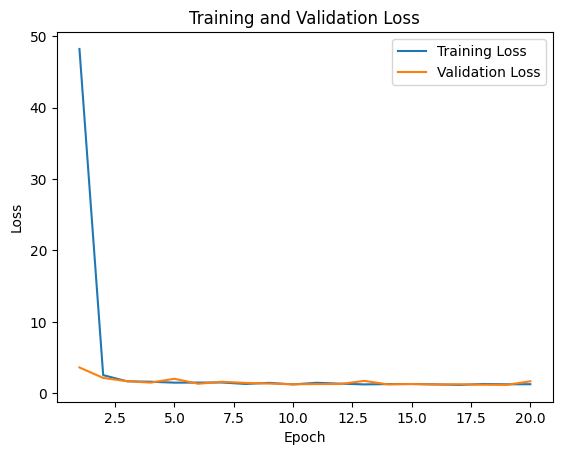

In [17]:
params = batch_gradient_descent(loss_fn, initial_params, train_data, val_data, learning_rate=0.01, num_epochs=20, batch_size=10)

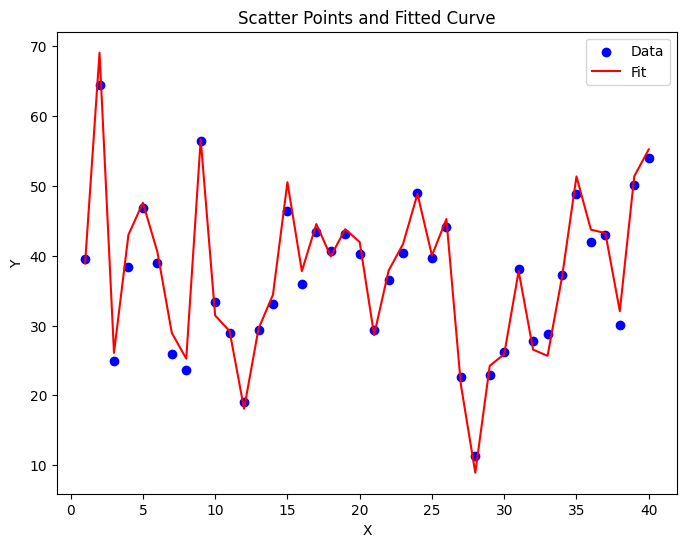

In [18]:
# plot the results on validation data
Xval, yval = val_data
plot_linear_fit(params, Xval, yval)

We can observe from the above that the model nicely fits the data. Hence the model has learned the function that was used to generate the data.

**Code task:** modify the learning rate and batch_size and see the effect it has on the loss function.

In [ ]:
# Your code here
learning_rate = ... # update here
params = batch_gradient_descent(loss_fn, initial_params, train_data, val_data, learning_rate=learning_rate, num_epochs=20, batch_size=10)

In [ ]:
# Your code here
batch_size = ... # update here
params = batch_gradient_descent(loss_fn, initial_params, train_data, val_data, learning_rate=0.01, num_epochs=20, batch_size=batch_size)

### 2.2 Non linear regression and neural networks  - <font color='blue'>`Beginner`</font>

In [ ]:
# @title Helper code to plot non-linear data
def plot_nonlinear_data():

  x = np.linspace(-5, 5, 100)
  y = np.cos(x)*x + x**2 + np.exp(-x/7)*3 + 0.3*x*np.sin(x)**4

  plt.scatter(x, y)
  plt.title("Example of non linear data")
  plt.show

plot_nonlinear_data()

Linear regression is a simple and powerful data inference method; however, it has limitations in capturing complex relationships. To model such complexities, we require more powerful models. For example no single line will perfectly fit the data in the above figure. Nonlinear models, such as polynomials, exponentials, and trigonometric functions, offer solutions to this problem.

Before the explosion of deep learning techniques, fitting pre-defined functions to datasets was the goto machine learning approach. Examples of classcial algorithms using this approach include support vector machines, naive Bayes, k-means clustering, among others.

In this section, we will introduce neural networks which is a the realm of deep learning techniques and recent sucess in machine learning.

#### Model representation - <font color='blue'>`Beginner`</font>


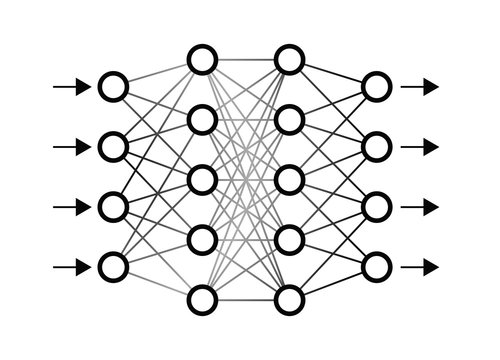

            Image of a neural network with two hidden layers.






Neural networks are a powerful class of machine learning models inspired by how the human brain functions. Unlike linear regression, which applies a single transformation to the data, neural networks process input data through a series of transformations before reaching the final predictive layer. The term 'Deep Learning' arises from the numerous transformations applied to the input data.

In the image, the circles represent nodes, and the links connecting them represent the model's parameters.

#### Activation functions - <font color='blue'>`Beginner`</font>
Activation functions are essential in neural networks. The input to every node is a linear function of all the nodes from the previous layer. Without applying an activation function, also called a non-linearity, the entire neural network, no matter how many layers it has, reduces to a simple linear model. Thus, activation functions are used to break the linearity and ensure that we build a complex non-linear function.

The equation for node \(i\) in layer \(j\) of a neural network can be expressed as follows:

$$ \text{Output}_{ij} = \text{Activation Function} \left( \sum_{k=1}^{n} \text{Weight}_{ijk} \times \text{Output}_{(j-1)k} + \text{Bias}_{ij} \right)$$

Where:
- $\text{Output}_{ij}$ is the output of node $i$ in layer $j$.
- $\text{Weight}_{ijk}$ is the weight connecting node $i$ in layer $j$ to node $k$ in layer $j-1$.
- $\text{Output}_{(j-1)k}$ is the output of node $k$ in layer $j-1$.
- $\text{Bias}_{ij}$ is the bias term for node $i$ in layer $j$.
- $\text{Activation Function}$ is the chosen activation function that introduces nonlinearity to the output of the neuron.



Some poplular activation functions include:

$\text{ReLU})(x) \, = \, \text{max}(0, x),$

$\text{tanh}(x)\, = \, \frac{e^x - x^{-x}}{e^x + e^{-x}},$

$\text{Sigmoid}(x) \, =\, \frac{1}{1+e^{-x}}$.

Let implement the popular [ReLU](https://arxiv.org/https://arxiv.org/abs/1803.08375abs/1803.08375) activation function.

In [ ]:
# Implementation of relu using simple python.

def relu(x):
  if x > 0 :
    return x
  else:
    return 0

def plot_activation(act_fn, label="act_fn"):
    max_int = 5
    # Generete 100 evenly spaced points from -max_int to max_int
    x = np.linspace(-max_int, max_int, 1000)
    y = np.array([act_fn(xi) for xi in x])
    plt.plot(x, y, label=label)
    plt.legend(loc="upper left")
    plt.xticks(np.arange(min(x), max(x) + 1, 1))
    plt.show()

plot_activation(relu, label='ReLU')

**Code Task:**

Implement and plot another activation function of your choice.


In [ ]:
def act_fn(x):
    # type your code here

    y = ...#
    return y

# Call the plotting function
plot_activation(act_fn, label=....) # update this



#### Building a simple neural network model with Jax - <font color='blue'>`Beginner`</font>

Futurnately, the are different high level modules that can be used to develop deep neural networks and we don't have implement everything from scratch. For example for jax based model we can use [haiku]( https://dm-haiku.readthedocs.io/en/latest/) and [flax](https://flax.readthedocs.io/en/latest/getting_started.html). Moreover advanced optimisation techniques can be implemented using [optax](https://optax.readthedocs.io/en/latest/). In this section we will use haiku to implement a simple 4 layer neural network.

In [ ]:
# Code for a 4-layer neural network using haiku.
# Here assume all the hidden layers have the same number of nodes.
# We will use the same activation relu for all the layers except the last layer.

class Network(hk.Module):
    def __init__(self, hidden_size, output_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size

    def __call__(self, x):
        # First layer with ReLU activation
        x = hk.Linear(self.hidden_size)(x)
        x = jax.nn.relu(x)

        # Second layer
        x = hk.Linear(self.hidden_size)(x)
        x = jax.nn.relu(x)

        # Third (output) layer with no activation applied
        x = hk.Linear(self.output_size)(x)

        return x

# Now we need to define a model function that uses the Network class above
def build_neural_network_fn(hidden_size, output_size):

  def model_fn(x):
      module = Network(hidden_size, output_size)
      return module(x)

  return model_fn

In order to use an haiku model we need to apply a transformation on it and then call the init function with some dummy data to initaliase the parameters. In the following cell we will apply two transformations. Firstly *hk.transform* and then *hk.without_apply_rng*. We use the second transformation because out neural network is deterministic so it doesn't require to sample random numbers at any stage when been applied to some inputs.   

In [ ]:
# transform and intialiase the model.
seed = 32
input_size = 4
hidden_size = 5
output_size = 1

# Calling the build_neural_network function and applying the required transformations
model = build_neural_network_fn(hidden_size, output_size)
model = hk.without_apply_rng(hk.transform(model))

To initialise parameters with an haiku transformed function, we call the *init function* with two parameters namelt a jax key and some dummy inputs.

In [ ]:
key = jax.random.PRNGKey(seed)
dummy = jnp.zeros((1, input_size), dtype=float)
initial_params = model.init(key, dummy)

To apply the model to some the data we need to call model.apply  with two parametes the current parameters and the input data.

In [ ]:
z = model.apply(initial_params, dummy)
print(z.shape, dummy.shape)

Now that we have the model and initial parameters, all we need is a loss function and some data then we can use the batch gradient decesnt function to train the model.

**Code task:**

write a loss function with the following syntax for our model.
Hint: look at the previous loss function we used for linear regression.

In [ ]:
# Code
def neural_network_loss_fn(params, X, y):
  # your code here

  loss = ...
  return loss


In [ ]:
# @title example solution (Try not to peek until you've given it a good try!')
def neural_network_loss_fn(params, X, y):

  pred  = model.apply(params, X)
  loss = 0.5*jnp.mean((pred-y)**2)

  return loss

## **Classification**
In this section, we will learn how to implement a machine learning model for classfification. Classifcation is a type machine learning task where the objective of the model is learn how to classify inputs into on of several categories. For example buiding a machine learning model to classifier dogs and cats using images of dogs and cats as inputs.

### 3.1 Logistic regression - <font color='blue'>`Beginner`</font>

Linear regression aims to find a function $f$ that maps our **inputs $x$**, where $x \in \mathbb{R}^d$ to the corresponding **output/target - $y$**, where $y \in \mathbb{R}^1$ (output is a single real number). Contrary to regression, the **output/target -$y$** can only take on certain values in logistic regression. When the **target** can only take on one of two values, the algorithm is called **Binary Clasification**. When we have more than two categories, it called a **Multi-class Classification**.

Hence the aim of Logistic regression (in the Binary classification case) is to map **inputs $x$**, where $x \in \mathbb{R}^d$ to $y$, where $y \in \{0,1\}$.

For example, if we are building an image classifier for cats and dogs, 1 maybe used to represent the target values for cats and 0 for dogs.

#### Logits and sigmoid activation function - <font color='blue'>`Beginner`</font>
The target values for logistic regression problems are discrete values. It is not straigtfoward how to define a model function that outputs discrete values. Hence we design the model to output probabilities instead. Recall that probabilies only lie the range of values $[0,1]$, thus hence we need a function that maps the probabilities in the range $[0,1]$ to $(-∞, ∞)$. This function is called the [logit function](https://en.wikipedia.org/wiki/Logit) hence the name logistic regression.
<br>
<center>
 $$logit(p) = \ln\frac{p}{1-p},$$
</center>
where $p$ is the probability.

**Let's plot the logit function.**

In [ ]:
def logit(p):
    # computes the logit function
    out = np.log(p/(1 - p + 1e-8)) # we add 1e-8 to just to avoid instances of division by 0
    return out

probs = np.random.uniform(0, 1, size=200)
probs = np.sort(probs)
plt.plot(probs, logit(probs), label="logit")
plt.legend(loc="best")

**Sigmoid function**

The goal of logistic regression is to predict the logit for each of our inputs but for the sake of classification, we are interested in the probabilities directly. So we need to invert the logit function to obtained the probabilities. The inverse of the logit function is the **Sigmoid** activation function. Hence in order to build a neural network for binary classification
<br>
<center>
 $$\sigma(x) = \frac{1}{1+e^{-x}}$$
</center>
<br>
<br>

**Exercise:** show that the Sigmoid function is the inverse of the logit function.

**Cross entropy loss function**

In binary classification we can only have one of two values for the targets, thus we can not use the same loss function as in previous regression example where the target output was continous. most appropriate function model for the errors in logistic regression is the [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution). This leads to the following error function for logistic regression most often refered to as the cross entropy loss function
<br>
<center>
 $$ -y_i \log(p_i) - (1-y_i) \log (1-p_i),$$
</center>
where $p_i = \sigma (z)$ with $z$ being the output of our model function.
<br>

**Code task**:
1. Implement the sigmoid activation function.
2. Implement the cross entropy loss function.


In [ ]:
def sigmoid(x):
    """sigmoid function 1/1+e^-x"""

    prob = .... # update me

    return prob

In [ ]:
# @title Run me to test your code
def test_sigmoid_fn():
  x  = np.array([0.7, 0.3, 0.8, 0.2])
  assert jnp.allclose(sigmoid(x), jax.nn.sigmoid(x)), "Test failed!"
  print("Nice! Your answer looks correct!")

  return

In [ ]:
# @title sigmoid solution (Try not to peek until you've given it a good try!')
def sigmoid(x):
  prob = 1/(1+jnp.exp(-x))

  return prob

In [ ]:
def cross_entropy_loss(predictions, targets):
    # you need to make sure we never have log of 0

    # use sigmoid to compute the probs from the predicitions
    probs = ... # update me

    # your code here
    loss = ... # update me

    return loss

In [ ]:
# @title Run me to test your code
def test_cross_entropy_loss():
  predictions = np.array([0.7, 0.3, 0.8, 0.2])
  targets = np.array([1, 0, 1, 0])

  # Expected cross-entropy loss for the test data
  expected_loss = 0.60669523

  # Calculate the cross-entropy loss using the implemented function
  computed_loss = cross_entropy_loss(predictions, targets)

  assert jnp.isclose(computed_loss, expected_loss), "Test failed!"

  # If the assert statement does not raise an exception, the test is passed.
  print("Nice! Your anwser looks correct")

  return

test_cross_entropy_loss()

In [ ]:
# @title Cross entropy loss solution (Try not to peek until you've given it a good try!')
def cross_entropy_loss(preds, targets):
    eps = 1e-15
    probs = sigmoid(preds)

    loss = -targets*jnp.log(probs+eps) - (1-targets)*jnp.log(1-probs+eps)

    return jnp.mean(loss)

#### Extending to Multi-class classification

In multi-class classification, the machine learning model is designed to handle more than two classes, where each class represents a different category or label. For example, in the case of a single-digit classifier, there are 10 classes, each corresponding to a digit from 0 to 9.

The model's output is typically a probability distribution over all possible classes, with each class having an associated probability. The dimensions of the output vector match the number of classes, so for a classifier with 3 different classes, the output vector will have a dimension of 3.

To make a prediction, the model selects the class with the highest probability as the predicted class for the input data point.

**One-hot encording**

One-hot encoding is a common technique used to represent categorical variables, such as class labels, as binary vectors. In the case of multi-class classification with 3 classes, the targets are transformed into one-hot encoded vectors as follows:

Class 1: [1, 0, 0]: This means the data point belongs to class 1, and the first element in the vector is set to 1, while the other elements are set to 0.

Class 2: [0, 1, 0]: This means the data point belongs to class 2, and the second element in the vector is set to 1, while the other elements are set to 0.

Class 3: [0, 0, 1]: This means the data point belongs to class 3, and the third element in the vector is set to 1, while the other elements are set to 0.

We can use `jax.nn.one_hot` function to one-hot encode our data


In [ ]:
# An example using one hot encoding
num_classes =  3
targets = jnp.array([2, 0, 1])
one_hot_targets = jax.nn.one_hot(targets, num_classes)
print(one_hot_targets)

**Exercise**: Discuss with your neighbour how we should define the loss function in the case of multi-class classification.

**Solution**: The loss function for a multi-classification is computed similarly to that of binary classifier. However in this case we define the loss as the sum of the loss for each of the individual classes.
<br>
<center>
 $$ \sum_c -y^c_i \log(p^c_i),$$
</center


>
where $p^c_i = \text{softmax}(z) = \frac{e^{z^c_i}}{\sum_c e^{z^c_i}}$ with $z$ being the output of our model function.
<br>
The main difference here is that we use a $\text{softmax}$ activation function instead of $\text{sigmoid}$ as for the binary case.

**Exercise**: Do your get the initution why this formula is similar to that for the binary case?

**Code task**:
  1. Implement the softmax activation function
  2. Implement a cross entropy loss function for multiclass classification using softmax and one hot encording.

In [ ]:
def softmax(logits):
  """Compute softmax: `exp(x)/sum(exp(x))`

  Args:
    logits: array of shape (num_samples, num_classes)

  Return:
    probs: array of shape (num_samples, num_classes)
  """

  # your code here
  # make sure you sum across the right axis

  probs = ... # update me

  return probs

In [ ]:
# @title Run me to test your code
def test_softmax():
  x = jnp.array([[1.0, 0.4, 0.3], [10.0, 4.6, 8.9]])
  assert jnp.allclose(softmax(x), jax.nn.softmax(x, axis=-1))
  print("Nice! Your answer looks correct.")

test_softmax()

In [19]:
# @title softmax solution (Try not to peek until you've given it a good try!')
def softmax(logits):
  exp_logits = jnp.exp(logits)
  return exp_logits / jnp.sum(exp_logits, axis=-1, keepdims=True)

In [ ]:
def cross_entropy_softmax_loss(predictions, targets):
    """Compute the cross entropy softmax loss function

      Args:
        predictions: (num_samples, num_classes)
        targets: (num_samples)
    """

    # Compute the softmax probabilities
    probs = ... # update me

    num_classes = ... # update me

    # One-hot encode the targets
    targets_one_hot = ... # update me

    # Compute the cross-entropy loss
    eps = 1e-15
    probs += eps # to avoid calling log with 0 values

    loss = ... # update me

    return loss

In [20]:
# @title Run me to test your code
def test_cross_entropy_softmax_loss():
  # Fixed predictions (logits) for each class
  predictions = jnp.array([[1.5, 0.3, 2.7],
        [0.8, 1.2, 3.1], [2.3, 1.7, 0.5],
        [3.0, 0.5, 1.2], [0.2, 2.8, 1.0]])

  # Fixed true class labels
  targets = jnp.array([2, 1, 0, 0, 2])

  # Expected loss computed manually
  expected_loss = 1.0456787

  # Compute the cross-entropy softmax loss using your implementation
  loss = cross_entropy_softmax_loss(predictions, targets)

  # Check if the computed loss matches the JAX built-in loss
  assert jnp.allclose(loss, expected_loss), "Loss value do not match!"

  print("Nice! Your answer looks correct.")

test_cross_entropy_softmax_loss()

NameError: ignored

In [21]:
# @title Cross entropy softmax solution (Try not to peek until you've given it a good try!')
def cross_entropy_softmax_loss(predictions, targets):
    """Compute the cross entropy softmax loss function

      Args:
        predictions: (num_samples, num_classes)
        targets: (num_samples)
    """

    # Compute the softmax probabilities
    probs = softmax(predictions) # update me

    num_classes = predictions.shape[-1]

    # One-hot encode the targets
    targets_one_hot = jax.nn.one_hot(targets, num_classes) # update me

    # Compute the cross-entropy loss
    eps = 1e-15
    probs += eps # to avoid calling log with 0 values

    loss_i = jnp.sum(-targets_one_hot*jnp.log(probs), axis=-1) # update me

    return jnp.mean(loss_i)

#### Building a simple neural network for classification - <font color='blue'>`Beginner`</font>

In this section we will assemble all the pieces together and train a deep neural network for classification. Let's recall all the tools we mentionned intially that are necessary to train a machine learning model.

1. Dataset: we need to have dataset which we will split into training and validation set in the ratio 80:20.
2. A model function.
3. A loss function.
4. An optimisation algorithm.

We will use a toy [sklearn](https://scikit-learn.org/stable/datasets/toy_dataset.html) dataset. We have not discussed data preprocessing but in practice we usually have to preprocess our datasets before using it for training. Such steps may include for example visualising the data to have intuition, identifying outliers, transforming and even dropping some features.

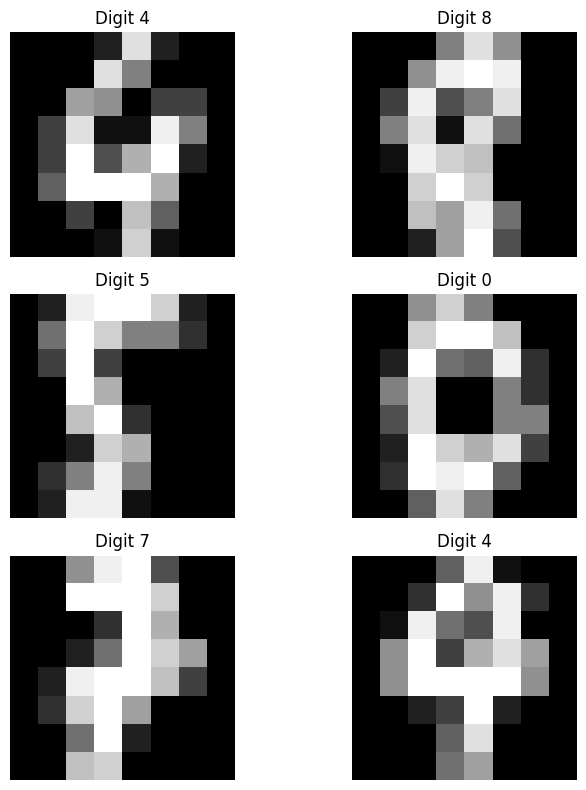

In [22]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import jax
import jax.numpy as jnp
import haiku as hk
from typing import NamedTuple, Any

import matplotlib.pyplot as plt
import numpy as np

# Let re-adapt our batch gradient descent function
def batch_gradient_descent(loss_fn, params, training_data, val_data, learning_rate=0.01, num_epochs=20, batch_size=10):
  """Batch gradient descent basic jax implementation.

  Args:
    loss_fn
      the loss function for our model.
    params:
      the initial parameters of the model.
    training_data
      a tuple with the features and targets for training.
    val_data
      a tuple with the features and targets for validation.
    learning_rate
      learning rate
    num_epochs
      number of epochs
    batch_size:
      size of every mini batch
  """

  X_train, y_train = training_data
  X_val, y_val = val_data

  num_samples, num_features = X_train.shape

  # Create empty list to store the training and validation loss.
  loss_train = [] # training loss
  loss_val  = [] # valisation loss

  # Define a function that computes loss and gradients
  loss_and_grad = jax.value_and_grad(loss_fn)

  for epoch in range(num_epochs):
    # Shuffle the data before every epoch
    shuffled_indices = np.arange(num_samples)
    np.random.shuffle(shuffled_indices)

    loss_train_epoch = []

    for start_idx in range(0, num_samples, batch_size):
      end_idx = start_idx + batch_size
      if end_idx > num_samples:
        end_idx = num_samples

      batch_indices = shuffled_indices[start_idx:end_idx]
      X_batch = X_train[batch_indices]
      y_batch = y_train[batch_indices]
      # Compute loss and gradients using value_and_grad
      loss, grads = loss_and_grad(params, X_batch, y_batch)
      loss_train_epoch.append(loss)

      # Update the parameters
      params = jax.tree_map(lambda p, g: p -learning_rate*g, params, grads)

    # We need to turn the list in to an array before applying jnp.mean
    mean_loss = jnp.mean(jnp.array(loss_train_epoch))
    loss_train.append(mean_loss)

    # Compute the validation loss at the end of the epoch
    loss_v = loss_fn(params, X_val, y_val)
    loss_val.append(loss_v)

  # Plot training and validation loss
  epochs = range(1, num_epochs+1)
  plt.plot(epochs, loss_train, label='Training Loss')
  plt.plot(epochs, loss_val, label='Validation Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training and Validation Loss')
  plt.legend()

  # Display the plot
  plt.show()

  return params

# Load a simple dataset - digits https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)
# and convert to an iterator. Although it would be faster to use pure jnp arrays in this example,
# in practice for large datasets we use iterators.
# Read here https://www.tensorflow.org/guide/data_performance for best practices.
def load_dataset(seed):
  # Load the diabetes dataset
  images, labels = datasets.load_digits(return_X_y=True)

  # These images consist of integer values from 0 to 16
  # We scale the images to min and max of 1
  x_max = 16.0
  x_min = 0.0

  images = (images - x_min)/(x_max - x_min)

  # These are images of shape 8x8 which have been flatten to shape 64
  X_train, X_test, y_train, y_test = train_test_split(
      images, labels, test_size=0.2, train_size=0.8, random_state=seed
  )

  train_dataset = (X_train, y_train)
  test_dataset = (X_test, y_test)

  return train_dataset, test_dataset

def plot_images(images, labels):
  num_images = 6
  rows = 3
  cols = 2

  fig, axes = plt.subplots(rows, cols, figsize=(8, 8))

  for ir in range(rows):
    for ic in range(cols):
      sample = np.random.randint(0, 1400)
      image = images[sample].reshape(8, 8)
      axes[ir, ic].imshow(image, cmap='gray')
      axes[ir, ic].axis('off')
      axes[ir, ic].set_title(f"Digit {labels[sample]}")

  plt.tight_layout()
  plt.show()

training_data, val_data = load_dataset(32)
plot_images(training_data[0], training_data[1])

**Code task:**
1. Build a neural network that outputs logits for each of the 10 classes.
2. Initialse your model with some dummy input.
3. Define your softmax cross entropy function.

In [ ]:
# @title your code here
class Network(hk.Module):
    def __init__(self, hidden_size, output_size):
        super().__init__()
        self.hidden_size = ... # update me
        self.output_size = ... # update me

    def __call__(self, x):
        # First layer with ReLU activation
        # Design your model here
        # Do not apply any activation on the last layer

        x = ...


        return x

# Now we need to define a model function that uses the Network class above
def build_neural_network_fn(hidden_size, output_size):

  def model_fn(x):
      module = Network(hidden_size, output_size)
      return module(x)

  return model_fn

# transform and intialiase the model.
seed = 32
input_size = 64 # remember our features are images of shape 8x8 flatten
hidden_size = ... # update me
output_size = ... # update me (hint: number classes)

# Calling the build_neural_network function and applying the required transformations
model = build_neural_network_fn(...) # update me
model = hk.without_apply_rng .... # update me

key = jax.random.PRNGKey(seed)
dummy = jnp.zeros((1, input_size), dtype=float)
initial_params = model.init(key, dummy)

def softmax(logits):
  exp_logits = jnp.exp(logits)
  return exp_logits / jnp.sum(exp_logits, axis=-1, keepdims=True)


def cross_entropy_softmax_loss(params, X, targets):
    """Compute the cross entropy softmax loss function

      Args:
        params: model parameters
        X: features arrary (num_samples, num_features)
        targets: (num_samples)
    """

    # use the model to compute the predictions
    predictions = ...

    # Compute the softmax probabilities
    probs = ... # update me

    num_classes = predictions.shape[-1]

    # One-hot encode the targets
    targets_one_hot = jax.nn.one_hot(targets, num_classes) # update me

    # Compute the cross-entropy loss
    eps = 1e-15
    probs += eps # to avoid calling log with 0 values

    loss_i = jnp.sum(-targets_one_hot*jnp.log(probs), axis=-1) # update me

    return jnp.mean(loss_i)


In [23]:
# @title Sample solution (Try not to peek until you've given it a good try!')
class Network(hk.Module):
    def __init__(self, hidden_size, output_size):
        super().__init__()
        self.hidden_size = hidden_size
        self.output_size = output_size

    def __call__(self, x):
        # First layer with ReLU activation
        x = hk.Linear(self.hidden_size)(x)
        x = jax.nn.relu(x)

        # Second layer
        x = hk.Linear(self.hidden_size)(x)
        x = jax.nn.relu(x)

        # Third (output) layer with no activation applied
        x = hk.Linear(self.output_size)(x)

        return x

# Now we need to define a model function that uses the Network class above
def build_neural_network_fn(hidden_size, output_size):

  def model_fn(x):
      module = Network(hidden_size, output_size)
      return module(x)

  return model_fn

# transform and intialiase the model.
seed = 67
input_size = 64
hidden_size = 5
output_size = 10

# Calling the build_neural_network function and applying the required transformations
model = build_neural_network_fn(hidden_size, output_size)
model = hk.without_apply_rng(hk.transform(model))

key = jax.random.PRNGKey(seed)
dummy = jnp.zeros((1, input_size), dtype=float)
initial_params = model.init(key, dummy)

def softmax(logits):
  exp_logits = jnp.exp(logits)
  return exp_logits / jnp.sum(exp_logits, axis=-1, keepdims=True)

def cross_entropy_softmax_loss(params, X, targets):
    """Compute the cross entropy softmax loss function

      Args:
        params: model params
        X: (num_features, num_classes)
        targets: (num_samples)
    """

    preds = model.apply(params, X)

    # Compute the softmax probabilities
    probs = softmax(preds) # update me

    num_classes = preds.shape[-1]

    # One-hot encode the targets
    targets_one_hot = jax.nn.one_hot(targets, num_classes) # update me

    # Compute the cross-entropy loss
    eps = 1e-15
    probs += eps # to avoid calling log with 0 values

    loss_i = jnp.sum(-targets_one_hot*jnp.log(probs), axis=-1) # update me

    return jnp.mean(loss_i)


#### Training the model - <font color='blue'>`Beginner`</font>




**Code task:**
  1. Call the `batch_gradient_descent` function to train the model.
  2. Vary the `learning_rate` and the `batch_size` and observe the behaviour of the loss function.

In [ ]:
params = batch_gradient_descent... # update me

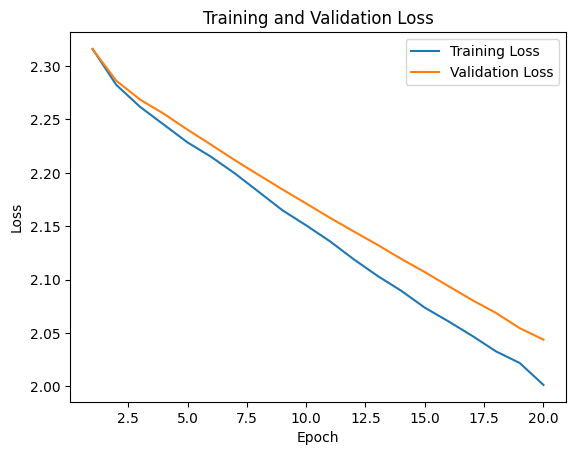

In [24]:
# @title Sample solution (Try not to peek until you've given it a good try!')
params = batch_gradient_descent(cross_entropy_softmax_loss, initial_params, training_data, val_data, learning_rate=0.01, num_epochs=20, batch_size=64)

#### Evaluating the model - <font color='blue'>`Beginner`</font>
So far the only metric we have used to evaluate the performance of our model is has been the loss function. However when training a machine learning model, several other metrics can be used to acess the perfomance of the model. Furthermore, hyper-parameters are generally selected (fine-tuned) based on the most important metric we want to optimise.
*   **Accuracy**: This the most common metric generally used in classification. It is measure for the proportion of the number of instances classified correctly. $$ \text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$

Other evaluation metrics sometimes used include Precision, Recall, F1 sore etc.


**Let's use accuracy to evaluate the perfomance of our trained classifier.**

Firstly let define a prediction function that transforms the model output to class. Recall the output of the classifier is logits which corresponds to unnormalised probabilities belonging to each class. Thus the predicted class is the one with the highest probability    

**Code Task**
  1. Implement the a function model predict that selects the appropriate class from the output of the model.

In [ ]:
# @title You code here
def model_predict(params, X):
    """Use the model for predicition

      args:
        params: model parameters
        X: features array (num_samples, num_features)

      return
        pred: predicted class (num_samples, 1)
    """

    # call the model to compute the logits
    logits = model... # update me
    preds = ... # update me

    return preds

In [ ]:
# @title Run to test your code
def test_model_predict():
    features = val_data[0][0:10]
    preds = model_predict(params, features)
    expected = jnp.argmax(model.apply(params, features), axis=-1)
    assert jnp.array_equal(preds, expected), "Failed! try again"
    print("Nice! Your answer looks correct.")

test_model_predict()

In [25]:
# @title Solution model predict (Try not to peek until you've given it a good try!')
def model_predict(params, X):
    """Use the model for predicition

      args:
        params: model parameters
        X: features array (num_samples, num_features)

      return
        pred: predicted class (num_samples, 1)
    """

    # call the model to compute the logits
    logits = model.apply(params, X)
    preds = jnp.argmax(logits, axis=-1)

    return preds

In [26]:
# @title Compute the accuray of your model
def compute_accuracy(data):
  """Compute the accuracy of the model"""

  X, y_true = data
  y_pred = model_predict(params, X).squeeze()

  acc = sum(y_pred==y_true)/len(y_true)

  return acc

train_acc = compute_accuracy(training_data)
val_acc = compute_accuracy(val_data)
print(f"The training accuracy is {train_acc} while the validation accuracy is {val_acc}")

The training accuracy is 0.27209463715553284 while the validation accuracy is 0.2527777850627899


# say a word on the accuracy

## Conclusion
**Summary:**

[Summary of the main points/takeaways from the prac.]

**Next Steps:**

[Next steps for people who have completed the prac, like optional reading (e.g. blogs, papers, courses, youtube videos). This could also link to other pracs.]

**Appendix:**

[Anything (probably math heavy stuff) we don't have space for in the main practical sections.]

**References:**

1. https://d2l.ai/chapter_linear-networks/linear-regression.html
2. https://jax.readthedocs.io/en/latest/notebooks/quickstart.html
3. https://buffml.com/common-machine-learning-algorithms/


For other practicals from the Deep Learning Indaba, please visit [here](https://github.com/deep-learning-indaba/indaba-pracs-2023).

## Feedback

Please provide feedback that we can use to improve our practicals in the future.

In [ ]:
# @title Generate Feedback Form. (Run Cell)
from IPython.display import HTML

HTML(
    """
<iframe
	src="https://forms.gle/Cg9aoa7czoZCYqxF7",
  width="80%"
	height="1200px" >
	Loading...
</iframe>
"""
)

<img src="https://baobab.deeplearningindaba.com/static/media/indaba-logo-dark.d5a6196d.png" width="50%" />